# Simple Linear Regression

__Aim__:

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
dataset = pd.read_csv("datasets_n_images/datasets_module_4/student_scores.csv")
dataset.shape

(25, 2)

In [61]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [62]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


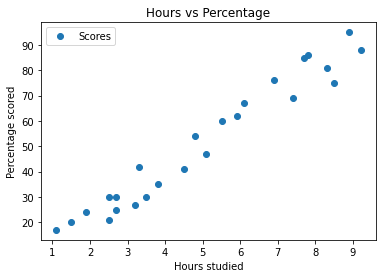

In [63]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show();

In [64]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]

In [65]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [66]:
X.shape

(25, 1)

In [67]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [68]:
y.shape

(25,)

In [69]:
np.random.rand(3,2)

array([[0.87729688, 0.55921585],
       [0.15237013, 0.42906977],
       [0.89783224, 0.23229948]])

In [70]:
np.random.seed(0)
np.random.rand(3,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [71]:
np.random.seed(990)
np.random.rand(3,2)

array([[0.9806089 , 0.26989058],
       [0.09874419, 0.42379487],
       [0.11342195, 0.61825621]])

In [72]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [73]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [74]:
y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [75]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [76]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [77]:
X_train.shape

(18, 1)

In [78]:
X_test.shape

(7, 1)

In [79]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
print("Intercept:",regressor.intercept_)

Intercept: 1.932204253151646


In [81]:
print("Slope:",regressor.coef_)

Slope: [9.94167834]


In [82]:
9.94167834 * 5.5 + 1.932204253151646

56.611435123151644

In [83]:
9.91 * 6.9 + 2.018

70.397

In [84]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [85]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [86]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [87]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


In [88]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9367661043365055


In [89]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [90]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153407


# Multiple Linear Regression

Predict the gas consumption (in million of gallons) in 48 US states based upon the gas taxes, per capita income, paved highways (in miles), and the proportion of population that has driving license.

In [91]:
dataset = pd.read_csv("datasets_n_images/datasets_module_4/petrol_consumption.csv")

In [92]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


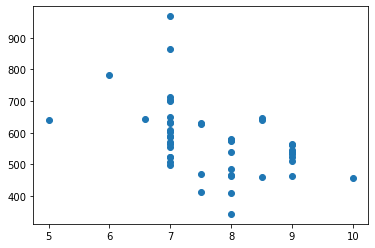

In [93]:
plt.scatter('Petrol_tax','Petrol_Consumption', data=dataset);

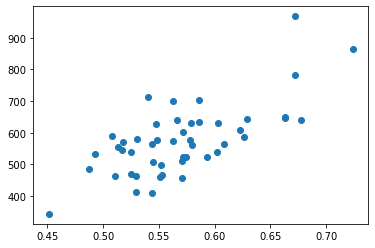

In [94]:
plt.scatter('Population_Driver_licence(%)','Petrol_Consumption', data=dataset);

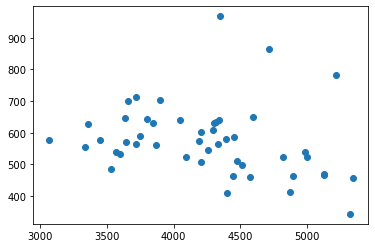

In [95]:
plt.scatter('Average_income','Petrol_Consumption', data=dataset);

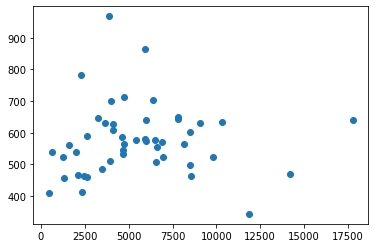

In [96]:
plt.scatter('Paved_Highways','Petrol_Consumption', data=dataset);

In [97]:
dataset.shape

(48, 5)

In [98]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [99]:
X = dataset.drop(['Petrol_tax','Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
# X = dataset.drop(['Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
X.head()

,Population_Driver_licence(%)
0,0.525
1,0.572
2,0.580
3,0.529
4,0.544


In [100]:
y = dataset['Petrol_Consumption']
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [101]:
X.shape

(48, 1)

In [102]:
y.shape

(48,)

In [103]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
X_train.shape

(38, 1)

In [105]:
X_test.shape

(10, 1)

In [106]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [107]:
regressor.coef_

array([1508.07066816])

In [108]:
regressor.intercept_

-285.66717240517744

In [109]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1508.070668


In [110]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,457.811667
4,410,534.723271
26,577,540.755554
30,571,495.513434
32,577,585.997674
37,704,598.062239
34,487,448.763243
40,587,658.385066
7,467,548.295907
10,580,513.610282


In [111]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.4885499524333
Mean Squared Error: 5725.070173663769
Root Mean Squared Error: 75.66419347130959


In [112]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.022932195966889557


In [113]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.30275707204414726


# Retrain

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

# Factors

>1. Need more data: What we have is just one year data, whereas multiple years data would have helped in getting a better model.

>2. Bad Assumptions: We made the assumption that the data has linear relationship, which may not be the case. Visualizing that first would have been a better idea.

>3. Poor features The features we used may not have had a high corelation to the values we are trting to predict.

>4. Granularity.